# Hello World on a 2 quibit Bell State


## Step 1: Map the problem to circuits and operators

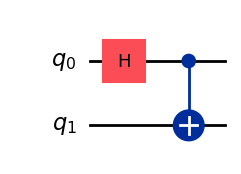

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0,1)

qc.draw(output='mpl')

In [10]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]


## Step 2: Optimize


## Step 3: Execute on the backend

In [11]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables) 

job.result()


EstimatorResult(values=array([ 1.        , -0.04492188, -0.04492188,  1.        ,  0.00390625,
        0.00390625]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0042655, 'sample_measure_time': 0.0011135, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 15773, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9979820251464844, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0042655, 'sample_measure_time': 0.0011

## Step 4: Post-process (and plotting)

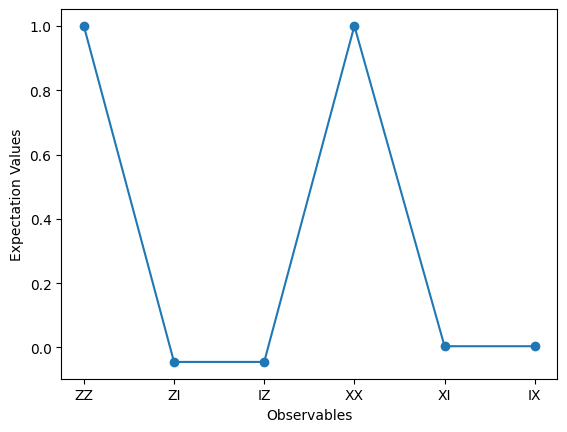

In [12]:
import matplotlib.pyplot as plt

data =  ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

# Extend the Hello World to an $n$-qubit GHZ state

## Step 1: Map the problem to circuits and operators

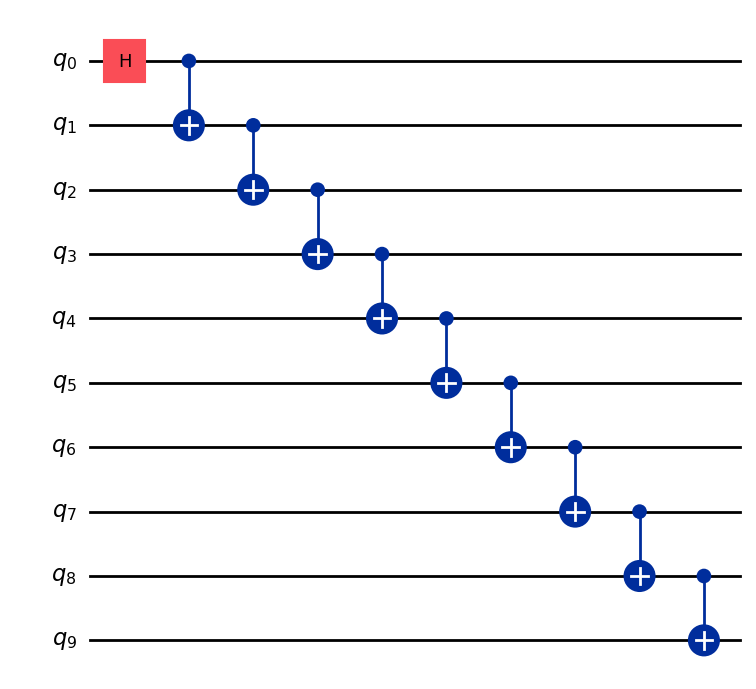

In [13]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [14]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)] 
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9


## Step 2 Optimaze the problem for the quantum execution

In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)
operator_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-23 08:50:49,041: Default instance not set. Searching all available instances.


QiskitBackendNotFoundError: 'No backend matches the criteria. Learn more about available backends here https://quantum.cloud.ibm.com/docs/en/guides/qpu-information#view-your-resources'

## Step 3 Execute on the backend

In [21]:
from qiskit_ibm_runtime import EstimatorVS as Estimator 
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.options_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operator_transpiled_list)])
job_id = job.job_id
print(job_id)

ImportError: cannot import name 'EstimatorVS' from 'qiskit_ibm_runtime' (c:\Users\isabe\miniconda3\envs\cwq\Lib\site-packages\qiskit_ibm_runtime\__init__.py)